<h4>1) In a relatively short paragraph describe the corpus that you will be using for your final project. The description should answer most of the questions I'd have about the nature and provenance of the text and you should anticipate any challenges you will need to confront to compile or prepare the corpus. If possible, provide a scope for the corpus (approximate number of documents, words, etc.).</h4>

<p>The dataset includes 123,524 tweets containing the terms "migrant" or "migration," along with associated metadata, from the period January 21 to March 4, 2019.  The data were collected via the Twitter Archiving Google Sheet (TAGS), which interfaces with the Twitter search API. Note that the Twitter search API does not provide all tweets matching the search criteria for the given time period and may reflect some biases. For example, González-Bailón et al. (2014) report that the Twitter search API over-represents central users and under-represents peripheral activity. For each observation (i.e, tweet), data is provided on 15 variables, nine that provide information about the author of the tweet and six that provide information about the tweet. In addition to the text of the tweet, the variables indicate tweet ID, tweet time and date, tweet components (e.g., hashtags, user mentions, links), tweet URL, tweet method (e.g., HTML indicating whether author tweeted via web app, phone, Facebook), tweet geographical coordinates (if available), author screen name and ID, author location (from profile), author follower count (users following the author), author friend count (users the author follows), author profile picture (URL), ID of the original author (if tweet is a reply) and ID of the original tweet (if tweet is a reply). Variables to be constructed include sentiment score and other metrics derived from the text of the tweets, which contain in total 2,351,687 word tokens. The corpus will require processing and cleaning. For example, a few variables will be dropped because of missing or duplicate data and several of the categorical variables will be recoded into fewer levels. Much of this work has been done, with summary statistics and early text analysis available at https://github.com/menyalas/llcu612Project. Remaining challenges include recoding author location data, stripping time information from the date/time variable, comparing author language to the language of the tweet itself, calculating sentiment scores and possibly adding a network measure. As a brief overview, the language of the tweets and their authors is, by and large, English and the country of residence of the authors is the United States. The 123,524 tweets emanate from 88,304 unique authors, include 97,185 retweets and refer to 10,729 unique hashtags. About 60% of all tweets are issued via a smartphone.</p>

<b>References</b>
<p>González-Bailón et al. (2014)Assessing the bias in samples of large online networks. Social Networks, 38. Retrieved March 25, 2019 at https://doi.org/10.1016/j.socnet.2014.01.004</p>

<h4>2) Embed a Voyant tool ideally using a text from your corpus (if you don't use that, use a text other than what we've seen so far in the notebooks). Provide a short description of what we're seeing with the embedded tool.</h4>

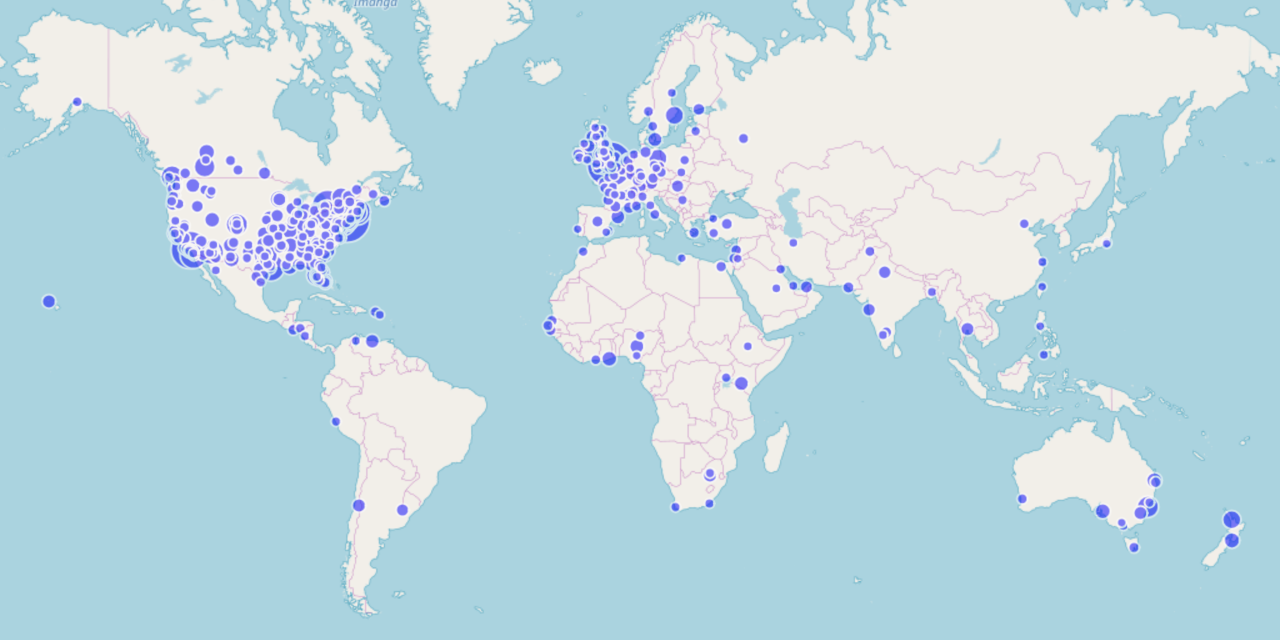

<p>I have chosen to use the Dreamscape tool to visualize the author locations of the tweets. Note that these are the "home" locations that the authors have entered into their profile settings. They are not the geographical coordinates of the author at the time of the tweet. That variable was dropped from the dataset because of the extremely large proportion of missing data (99.96%). The image above shows the static visualization of the location data, which was exported from Python into a csv file and then uploaded to Voyant. The size of the circle reflects the number of times the associated location was named by an author as their home location. While this tool is helpful in showing the concentration of authors in the United States and Europe, it fails to capture the degree of dominance of the US authors because the visualization does not show cases in which only a country or state is cited. This is important because the most frequently cited location was "United States" (n = 3475) followed by "USA" (n = 1187) then a series of US states before arriving at Washington, DC, the first named city but only the sixth most frequent location (n = 680). </p>
<p>I wasn't able to embed the animated version of the Dreamscape tool. I am therefore adding the animated visualization for a second tool: Bubblelines. The data show a spike in tweets related to migrants and migration on February 26, 2019, the day the U.S. House of Representatives voted to block President Trump's emergency order to fund construction of a wall on the southern border. The Bubblelines tool shows the frequency of terms as distributed from the beginning to end of the corpus. By selecting terms associated with this politically charged legislative act, I hoped to be able to confirm that the spike was indeed associated with this event. The increased occurence of "declar*", "emergenc*" and "vot*" toward the right side of the visualization might support this hypothesis; however, the results are not overwhelmingly clear. As a reminder, the time period for the tweets is January 21 to March 4, 2019. Thus, the vote would have happened toward the end of the collection period.</p>

In [16]:
from IPython.display import IFrame    
IFrame('https://voyant-tools.org/?view=Bubblelines&stopList=keywords-f9d06e152c7d74fc47b491567f4b1dc6&bins=80&query=vot*&query=democrat*&query=fund*&query=trump*&query=bill*&query=house*&query=wall*&query=declar*&query=emergenc*&docId=7043d83e9556b2145ac386f37a3e2cf4&corpus=386c20accc8f1779d92f3e6d47469cfe', width=900, height=450)

<h4>3) With the same text (ideally from your corpus but possibly from elsewhere) generate a simple term frequency graph as has been modelled in the meta-guide. Briefly comment on what you see. Comment the code as appropriate.</h4>

In [2]:
#This code was developed by my teammate Sunyam Bagga. I have adapted it for use in this notebook.
#From this point on, the code annotation is that of Sunyam. 
import pandas as pd

In [3]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('20190313_TW_MigrantMigration.csv')

In [6]:
df[:0]

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str


In [7]:
tweets = df['text'].tolist()

In [8]:
# list of built-in stopwords for the top languages
languages = ['english', 'french', 'german', 'spanish']

STOPWORDS = []
for lang in languages:
    STOPWORDS.extend(stopwords.words(lang))

# Stopwords that I came across: amp represents '&' and "n't" is not
custom_stopwords = ["amp", "n't", "rt"]

STOPWORDS.extend(custom_stopwords)
print("4 languages + custom stopwords, we have a total of {} words.".format(len(STOPWORDS)))

4 languages + custom stopwords, we have a total of 881 words.


In [9]:
all_words = []

for tweet in tweets:
    words = word_tokenize(tweet)
    
    for w in words:
        word = w.lower() # change to lowercase
            
        if word[0].isalpha() and word not in STOPWORDS: # skip non-words and skip stopwords
            all_words.append(word)

print("There are a total of {} word tokens.".format(len(all_words))) # Includes repetition

There are a total of 2351682 word tokens.


In [10]:
word_freq = FreqDist(all_words) # Calculates the frequency of each word
print(word_freq.most_common(20)) # 20 most frequent words:

[('https', 107479), ('migrant', 64977), ('migration', 41411), ('border', 20936), ('children', 19814), ('trump', 11709), ('us', 11044), ('caravan', 10782), ('people', 8672), ('crisis', 8243), ('u.s.', 7449), ('migrants', 6711), ('families', 6262), ('via', 6155), ('thousands', 6149), ('say', 5789), ('new', 5648), ('kids', 5465), ('custody', 5354), ('one', 5007)]


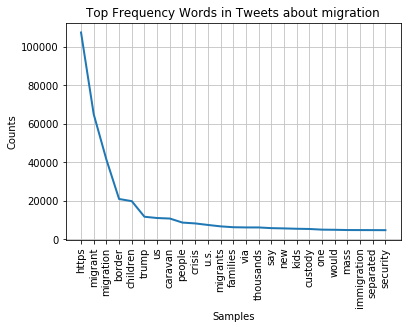

In [11]:
# Plot them:
word_freq.plot(25, title="Top Frequency Words in Tweets about migration")

<p>The terms that most clearly indicate the association between the February 26, 2019, vote and the spike in tweets do not appear at the top of the most frequent terms list. This makes sense given that the spike was brief. One of the terms selected for the Bubblines graph was Trump. This term did not serve as a flag for the legislative event because it is, in fact, one of the most frequently occuring terms in the dataset, from beginning to end. The fact that the two most frequent terms are "migrant" and "migration" is not surprising, given that these were the search terms used to harvest the tweets.</p>